In [1]:
import matplotlib.pyplot as plt
import math
import sys
sys.path.append("../lib")
from pylib import pltInit,Point,DataFile

In [23]:
def drawAverage(ax:plt.Axes,average:float):
    ax.set_xscale('log')
    ax.set_ylim(0,.5)
    ax.set_xlim(1e0,1e8)
    xl,yl=DataFile('EstimatingIntegral-output.txt').readData()
    ax.scatter(xl,yl,label='simulation',s=100,c='r')
    ax.plot([1,1e8],[average,average],label='exact')
    ax.legend()

In [33]:
def drawSD(ax:plt.Axes,average:float):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('$N$')
    ax.set_ylim(1e-4,1)
    ax.text(1e4,.5,'deviation')
    xl,yl=DataFile('EstimatingIntegral-output.txt').readData(y=2)
    ax.scatter(xl,yl,label='simulation',s=100,c='r')
    x=1
    xl=[x]
    while x<1e8:
        x *= 2
        xl.append(x)
    xl.append(1e8)
    yl = [math.sqrt((1-average)/(average))/math.sqrt(x) for x in xl]
    ax.plot(xl,yl,label='expected')
    ax.legend()

In [34]:
def draw(average:float):
    fig,ax = plt.subplots(2,1,figsize=(18,12), facecolor='white',sharex=True)
    plt.suptitle('Estimating Integral')
    drawAverage(ax[0],average)
    drawSD(ax[1],average)
    plt.savefig('EstimatingIntegral.pdf')


In [39]:
def drawImage(integrand:callable):
    plt.figure(figsize=(9,6),facecolor='white')
    plt.title('Estimating Integral (image)')
    plt.ylim(0.,1)
    plt.xlim(0,math.pi/2)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    n=1024
    xl = [x*math.pi/2/n for x in range(n)]
    yl = [integrand(x) for x in xl]
    plt.plot(xl,yl,label='$f(x)$',linewidth=5,c='r')
    for k in ['accept','reject']:
        xl, yl = DataFile(f'EstimatingIntegral-{k}-output.txt').readData()
        plt.scatter(xl,yl,label=k,s=100)
    plt.legend()
    plt.savefig('EstimatingIntegral-image.pdf')

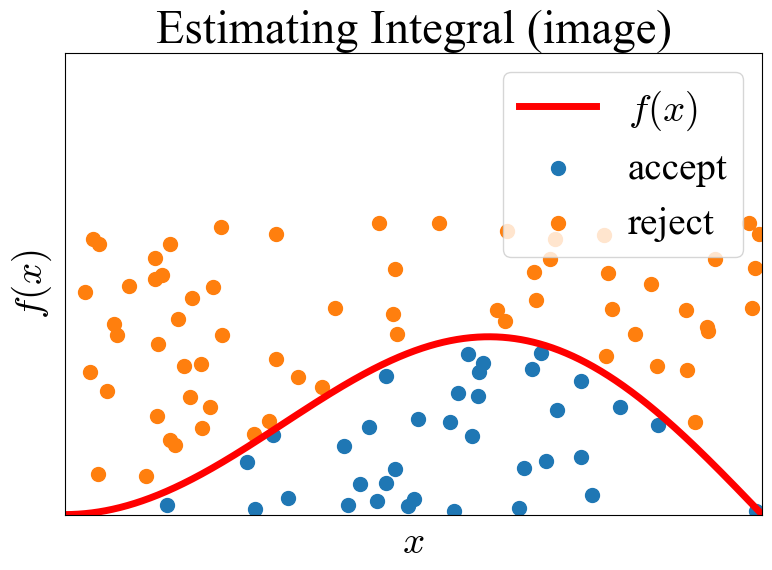

In [40]:
pltInit()
#for exercise2023
def integrand(x):
    return math.sin(x)*math.sin(x)*math.cos(x)
average = 1/3.
#draw(average)
drawImage(integrand)